In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [201]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [216]:
df = pd.read_csv('./train.csv')
df_kg = pd.read_csv('./test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_kg.set_index('PassengerId', inplace=True)
df1.drop(['Name','Cabin','Embarked','Ticket','SibSp'], axis=1, inplace=True)
df_kg.drop(['Name','Cabin','Embarked','Ticket','SibSp'], axis=1, inplace=True)

In [217]:
# 결측치 처리
df1.Age.fillna(df1.Age.median(), inplace=True)
df_kg.Fare.fillna(df1.Fare.median(), inplace=True)
df_kg.Age.fillna(df1.Age.median(), inplace=True)
m1_med = df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male'), 'Age'].median()
m2_med = df1.loc[(df1.Pclass == 2) & (df1.Sex == 'male'), 'Age'].median()
m3_med = df1.loc[(df1.Pclass == 3) & (df1.Sex == 'male'), 'Age'].median()
f1_med = df1.loc[(df1.Pclass == 1) & (df1.Sex == 'female'), 'Age'].median()
f2_med = df1.loc[(df1.Pclass == 2) & (df1.Sex == 'female'), 'Age'].median()
f3_med = df1.loc[(df1.Pclass == 3) & (df1.Sex == 'female'), 'Age'].median()
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male'), 'Age'].fillna(m1_med, inplace=True)
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m1_med
df1.loc[(df1.Pclass == 2) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m2_med
df1.loc[(df1.Pclass == 3) & (df1.Sex == 'male')&(df1.Age.isna()), 'Age'] = m3_med
df1.loc[(df1.Pclass == 1) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f1_med
df1.loc[(df1.Pclass == 2) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f2_med
df1.loc[(df1.Pclass == 3) & (df1.Sex == 'female')&(df1.Age.isna()), 'Age'] = f3_med

In [218]:
# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_kg[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_kg[i] = globals()[f'df_kg_{i}_encoder'].transform(df_kg[i])

In [219]:
# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

In [220]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [221]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.40457297e-01, 5.90844602e-02, 2.32565239e-04, 1.52204300e-04,
       7.34737782e-05])

In [184]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum >= 0.95) + 1
PCA(n_components=d)
X2D = pca.fit_transform(X_train)
X2D

array([[-12.83043195, -27.61159773,   1.20149429,  -0.14330282,
          0.66449149],
       [-24.52226809,   2.24972523,  -0.17725439,   0.61586506,
          0.16379209],
       [-17.39702278,  -0.46558036,   0.72373061,   0.42068488,
          0.35786205],
       ...,
       [-21.41830996, -10.32127067,  -0.65788829,  -0.4825464 ,
          0.38849044],
       [-17.12759473,  -8.47434268,   0.58373885,   0.31052884,
          0.39418593],
       [-16.87007964,   7.53311209,  -0.09375703,   0.76445177,
          0.13576767]])

In [185]:
d

2

In [94]:
# #설명된 분산의 비율
# #적절한 차원 수 선택하기

# pca=PCA()
# pca.fit(X_train)
# #cumsum은 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수.

# cumsum=np.cumsum(pca.explained_variance_ratio_)
# #np.argmax 함수는 함수 내에 array와 비슷한 형태(리스트 등 포함)의
# #input을 넣어주면 가장 큰 원소의 인덱스를 반환하는 형식입니다.
# #다만, 가장 큰 원소가 여러개 있는 경우 가장 앞의 인덱스를 반환합니다.

# d=np.argmax(cumsum>=0.95)+1
# PCA(n_components=d)
# X2D=pca.fit_transform(X_train)

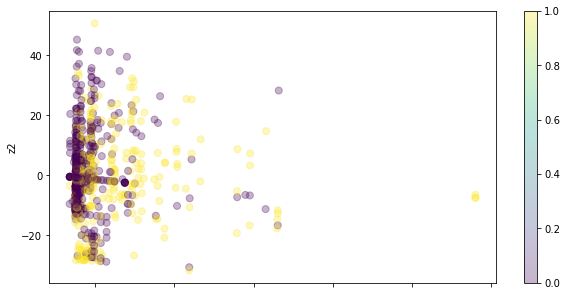

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
result = pd.DataFrame(X2D)
result.index = list(range(1, 892))
result.columns = ['z1', 'z2']
result['y'] = y
result
result.plot(kind='scatter', x='z1', y='z2', figsize=(10, 5),
        cmap='viridis', c=y, s=50, alpha=0.3)
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=d)
XTD = pca.fit_transform(X)

In [187]:
pca_xt = PCA()
pca_xt.fit(X_test)
pca_xt.explained_variance_ratio_
cumsum_t = np.cumsum(pca_xt.explained_variance_ratio_)

In [188]:
cumsum

array([0.9404573 , 0.99954176, 0.99977432, 0.99992653, 1.        ])

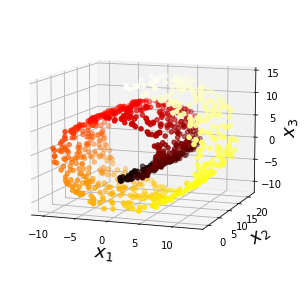

In [189]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
# save_fig('swiss_roll_plot')
plt.show()

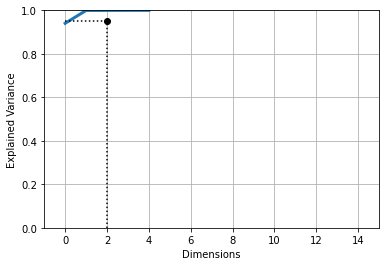

In [190]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.xlim(-1,15)
#plt.annotate('Elbow', xy=(65, 0.85), xytext=(70, 0.7),
#             arrowprops=dict(arrowstyle='->'), fontsize=16)
plt.grid(True)
#save_fig('explained_variance_plot')
plt.show()

In [191]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
X_recoverd = pca.inverse_transform(X_reduced)
X_reduced

array([[-12.83043195, -27.61159773],
       [-24.52226809,   2.24972523],
       [-17.39702278,  -0.46558036],
       ...,
       [-21.41830996, -10.32127067],
       [-17.12759473,  -8.47434268],
       [-16.87007964,   7.53311209]])

In [192]:
pca_t = PCA(n_components=2)
Xt_reduced = pca.fit_transform(X_test)

In [193]:
rf = RandomForestClassifier()
rf.fit(X_reduced, y_train)
pred_red = rf.predict(Xt_reduced)
accuracy_score(y_test, pred_red)

0.7

In [194]:
X_recoverd

array([[ 2.93914823,  0.5527743 ,  0.98418506,  0.69550901, 20.5785434 ],
       [ 2.4875502 ,  0.68797036, 30.49499668,  0.27840445,  8.04405324],
       [ 2.47394356,  0.66546318, 27.98300697,  0.33676455, 15.24320703],
       ...,
       [ 2.69405966,  0.63411879, 18.02014173,  0.44786894, 11.50356528],
       [ 2.62091108,  0.63403309, 19.98718862,  0.43897037, 15.73991711],
       [ 2.31998187,  0.69551255, 35.99128451,  0.23737029, 15.54279748]])

In [195]:
X_train

,Pclass,Sex,Age,Parch,Fare
PassengerId,,,,,
789,3,1,1.0,2,20.5750
815,3,1,30.5,0,8.0500
710,3,1,28.0,1,15.2458
480,3,0,2.0,1,12.2875
712,1,1,28.0,0,26.5500
...,...,...,...,...,...
20,3,0,28.0,0,7.2250
355,3,1,28.0,0,7.2250
758,2,1,18.0,0,11.5000


In [104]:
# 154분할 할 컬럼이 없어서 안되는건가?

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

ValueError: n_components=154 invalid for n_features=5, need more rows than columns for IncrementalPCA processing

In [207]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train).transform(X_train)

array([[ 0.94673213],
       [ 1.27548012],
       [ 1.38688783],
       [-1.30801361],
       [-0.28931733],
       [ 1.28714028],
       [-0.47058491],
       [ 1.21911371],
       [-0.54887812],
       [-1.98648645],
       [-1.85462301],
       [ 0.10386122],
       [-0.53383012],
       [ 1.36800379],
       [-0.90225813],
       [-0.25507833],
       [-1.61463138],
       [-0.15365107],
       [ 1.19935052],
       [-0.50710217],
       [-0.89159207],
       [ 1.42325078],
       [-0.98335268],
       [ 1.22001102],
       [ 0.9347884 ],
       [-1.16282247],
       [ 1.84770275],
       [-0.89165655],
       [ 1.29933777],
       [ 0.48265709],
       [ 1.37842271],
       [ 0.13065814],
       [-1.00428723],
       [ 0.44940509],
       [-2.54572143],
       [-0.83687524],
       [ 0.44775184],
       [ 1.21915136],
       [-1.61955131],
       [ 1.20028548],
       [ 1.22001643],
       [ 0.63186421],
       [ 0.76748054],
       [-2.18927506],
       [ 1.53602298],
       [ 1

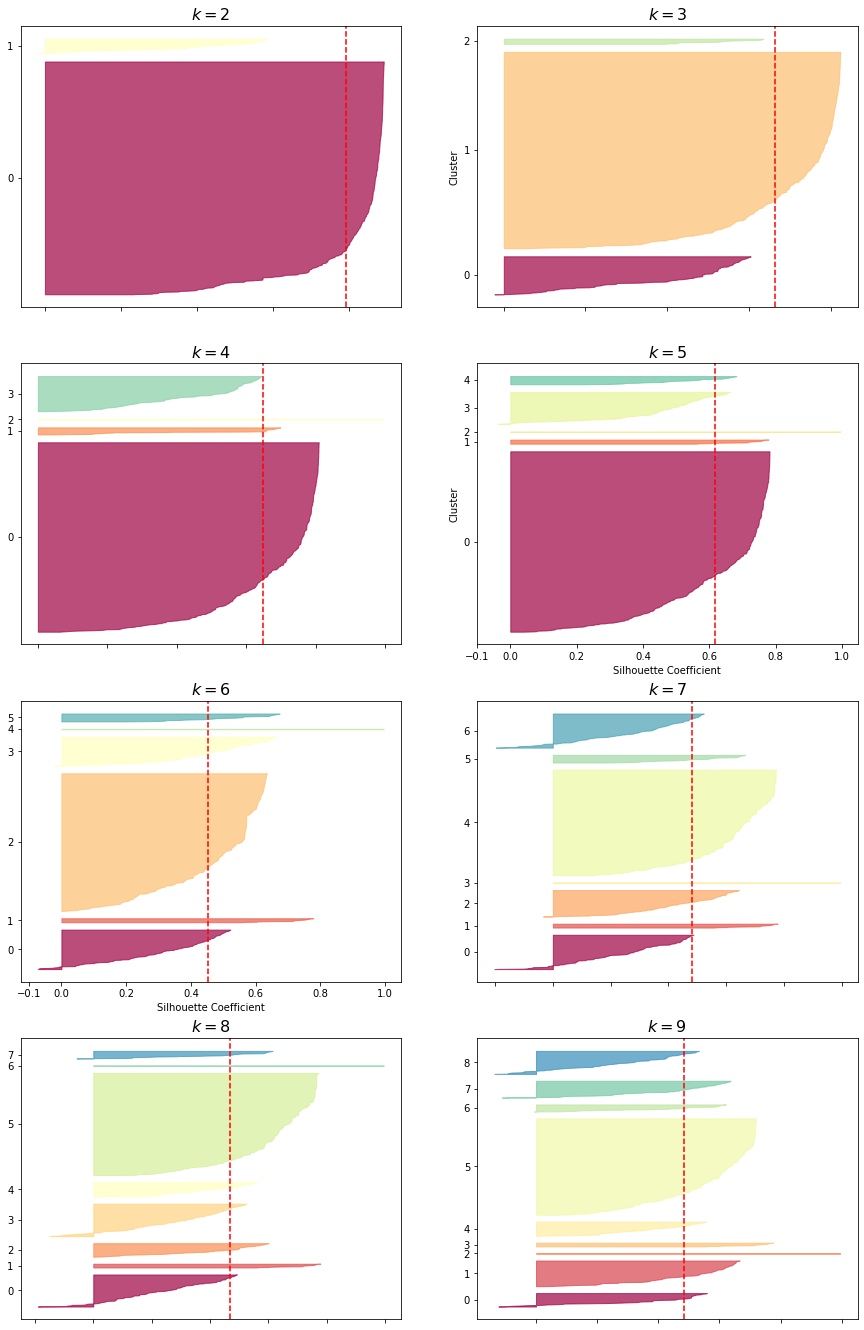

In [209]:
# 클러스트링은 데이터에서 비슷한 객체들을 하나의 그룹으로 묶는 것
# 1.K-means clustering

# 타이타닉 survived 제외
# X값들로 군집화 Kmeansabs
# 최적의 군집 개수는 몇 개? 실루엣스코어
# 임의로 2개의 군집을 만들고 Survived와 비교

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=19).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(15, 30))
for k in range(2, 10):
    plt.subplot(5, 2, k-1)
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel('Cluster')
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)
#save_fig('silhouette_analysis_plot')
plt.show()

In [229]:
kaggle_answer

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [237]:
# 군집의 또 다른 사용처는 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 사용하는 준지도
# 타이타닉 학습 데이터의 개수를 50개로 제한
kaggle_answer = pd.read_csv('./answer_tit.csv')
X50 = X.head(50)
y50 = y.head(50)
rf = RandomForestClassifier()
rf.fit(X50, y50)
pred_rf = rf.predict(df_kg)
kaggle_answer.drop('PassengerId', axis=1, inplace=True)
accuracy_score(kaggle_answer, pred_rf)

0.6794258373205742

In [255]:
# 나머지 학습 데이터의 레이블 삭제
# 전체 학습 데이터 세트를 kmeans로 50개의 군집화 진행 
# 각 군집 센트로이드에서 가장 가까운 샘플 50개 확인(.cluster_centers_)
# np.argmin()
num = 4
rf = RandomForestClassifier()
rf.fit(X.iloc[:num], y.iloc[:num])
print(f'임의의 샘플 {num}개 예측 결과 :', round(rf.score(df_kg, kaggle_answer), 3))

clusters = 4
kmeans = KMeans(n_clusters=clusters)
X_semi = kmeans.fit_transform(X)
represenstative_idx = np.argmin(X_semi, axis=0)
X_semi_trn = X.loc[represenstative_idx]
y_semi_trn = y.loc[represenstative_idx]

rf_semi = RandomForestClassifier()
rf_semi.fit(X_semi_trn, y_semi_trn)
print(f'대표 군집 {clusters}개 예측 결과 : ', round(rf_semi.score(df_kg, kaggle_answer), 3))

임의의 샘플 4개 예측 결과 : 0.435
대표 군집 4개 예측 결과 :  0.603


array([14,  1, 36, 32, 35])